## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns
import plotly.express as px

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Import fichier

In [2]:
# import fichier products 
products = pd.read_csv('products.csv', sep='\t', low_memory=False)

In [3]:
# affichage table
products.head(5)

code                                                url  \
0  0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
1  0000000004530  http://world-fr.openfoodfacts.org/produit/0000...   
2  0000000004559  http://world-fr.openfoodfacts.org/produit/0000...   
3  0000000016087  http://world-fr.openfoodfacts.org/produit/0000...   
4  0000000016094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity  ... ph_100g fruits-vegetables-nuts_100g  \
0          NaN      1kg  ...     NaN                         NaN   
1          NaN      NaN  ...     NaN                         NaN   
2          NaN      NaN  ...     NaN                         NaN   
3          NaN      NaN  ...     NaN                         NaN   
4          NaN      NaN  ...     NaN                         NaN   

  collagen-meat-protein-ratio_100g cocoa_100g chlorophyl_100g  \
0                              NaN        NaN             NaN   
1                              NaN        NaN             NaN   
2                              NaN        NaN             NaN   
3                              NaN        NaN             NaN   
4                              NaN        NaN             NaN   

  carbon-footprint_100g nutrition-score-fr_100g nutrition-score-uk_100g  \
0                   NaN                     NaN                     NaN   
1                   NaN                    14.0                    14.0   
2                   NaN                     0.0                     0.0   
3                   NaN                    12.0                    12.0   
4                   NaN                     NaN                     NaN   

  glycemic-index_100g water-hardness_100g  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 NaN                 NaN  

[5 rows x 162 columns]

## Analyse DataFrame

In [4]:
# affichage numero des colonnes et lignes
print('il y a ',products.shape[1], 'colonnes et', products.shape[0], 'lignes')

il y a  162 colonnes et 320772 lignes


**Commentaires**
- Le nombre des colonnes est très élevées.

In [5]:
# methode pour créer un graphique pour montrer la pourcentage des valeurs NaN
def plot_vn(data):
    nan_columns = pd.DataFrame({col:{
        'count' : data[col].isna().sum(), 
        'pourc': (data[col].isna().sum()/data.shape[0])*100} for col in data.columns}).transpose()
    fig = px.bar(nan_columns, color='count', y='pourc',hover_data=['count'],
                labels=dict(index = 'Colonnes', pourc='Pourcentages valeurs Nan'),
                title='Pourcentages des valeurs nulles dans le dataframe',
                 width=1000,
        height=800)
    fig.update_layout(xaxis={'categoryorder': 'total ascending'})
    fig.show()

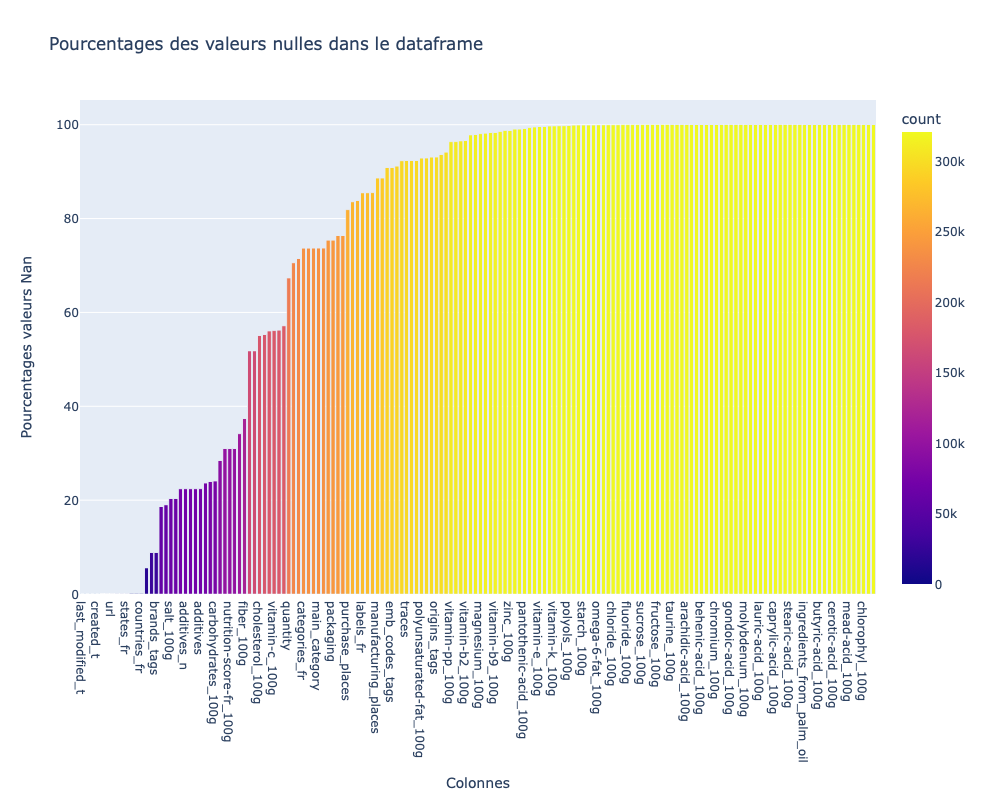

In [6]:
# affichage graphiques valeurs NaN 
plot_vn(products)

**Commentaire**
- Présence de nombreuses colonnes qui sont nulles a 100%.

## Nettoyage des données

##### Etapes nettoyage
1. Création d'une copie du DF pour effectuer les opérations de nettoyage
2. Supprimer les colonnes ou les valeurs nulles sont plus de 50 % 
3. Traitement des doublons
4. Traitement des colonnes
5. Traitement des valeurs nulles restantes
6. Traitement des valeur aberrantes et atypiques

### 1. Creation copy

In [7]:
# Creation copie du df original
products_tmp = products.copy()

### 2. Traitemens colonnes avec valeurs nulles superieures de 50%

In [8]:
# affichage nombre des valeurs manquantes
''' On compte le valeurs nulles et on les sommes pour returner le nombre des valeurs manquantes'''
tot_valeurs_manquantes = products.isna().sum().sum()
print('Nombre totale des valeurs manquantes', tot_valeurs_manquantes)

''' On compte les valeurs totales et donc on effectue les calculs
pour returner la pourcentage des valeurs 
manquantes par rapport aux valeurs totales'''

valeurs_tot = products.size
print('Pourcentage valeurs manquantes sur le total est de : ',  round(((tot_valeurs_manquantes / valeurs_tot)*100),2),'%')


Nombre totale des valeurs manquantes 39608589
Pourcentage valeurs manquantes sur le total est de :  76.22 %


In [9]:
# supprimer les colonnes qui ont plus de 50% des valeurs nulles
for columnName in products_tmp:
    '''On effectue un controle avec le statement if pour verifier si la colonne plus ou egale a 50% des valeurs nulles, si le
    statement resulte vrai on supprime la colonne'''
    if((products_tmp[columnName].isnull().sum()*100)/products_tmp.shape[0]) >= 50:
       products_tmp.drop(columns=columnName, inplace=True)

In [10]:
# controles des valeurs manquantes sur les totale apres drop des colonnes => 50%
tot_valeurs_manquantes_tmp = products_tmp.isna().sum().sum()
print('Nombre totale des valeurs manquantes', tot_valeurs_manquantes_tmp)
print('Pourcentage valeurs manquantes sur le total est de : ',  round(((tot_valeurs_manquantes_tmp / valeurs_tot)*100),2),'%')

Nombre totale des valeurs manquantes 1534985
Pourcentage valeurs manquantes sur le total est de :  2.95 %


### 3. Traitement des doublons

La colonne *Code* sera notre cles primaire pour le traitement des doublons

In [11]:
# controle lignes null dans la colonne code avant supression
print('lignes avant suppression ' ,products_tmp['code'].isnull().sum())
# drop des valeurs nulles dans la colonne code
products_tmp.dropna(subset='code', inplace=True)
## controle lignes null dans la colonne code avant supression
print('lignes apres suppression' ,products_tmp['code'].isnull().sum())

lignes avant suppression  23
lignes apres suppression 0


In [12]:
# affichage nombre des doublons
''' On sort les valeurs par la date de creation created_t et puis on utilise la colonne 
code comme valeur a controler pour les doublons'''
doublons = products_tmp.sort_values('created_t').duplicated(subset='code').shape[0]
print('Les doublons sont: ', products_tmp.sort_values('created_t').duplicated(subset='code').sum())


Les doublons sont:  0


In [13]:
# controle des doublons
''' if statement pour controler s'y il a des doublons, et que, dans le cas ou il y a des doublons retourne le nombre des ces dernier
et puis fait un drop, sinon, il print que il n'y a pas des doiublons'''
if (products_tmp.sort_values('created_t').duplicated(subset='code').sum()) > 0 :
    print('Les doublons sont: ', products_tmp.sort_values('created_t').duplicated(subset='code').sum())
    # suppression des doublons
    products_tmp = products_tmp.sort_values('created_t').drop_duplicates(subset='code', keep='last')
else:
    print("Il n'y a pas des doublons")

Il n'y a pas des doublons


### 4. Feature engineering

On va utiliser les Nutriscore pour determiner le colonne à utiliser pour notre application.
On vas ausssi maintenir les colonnes avec les brands pour effectuer des analyses, et puis les colonnes qui nous donnes le nutriscore

##### Elements favorable
- Apport calorique pour cent grammes.
- Teneur en sucre.
- Teneur en graisses saturées.
- Teneur en sel.

##### Elements defavorable
- Teneur en fibres.
- Teneur en protéines.

In [14]:
# creation nouveaux DataFrame
data = products_tmp[['code','brands','energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g','nutrition_grade_fr', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g']]

### 5. Traitement des valeurs nulles restantes

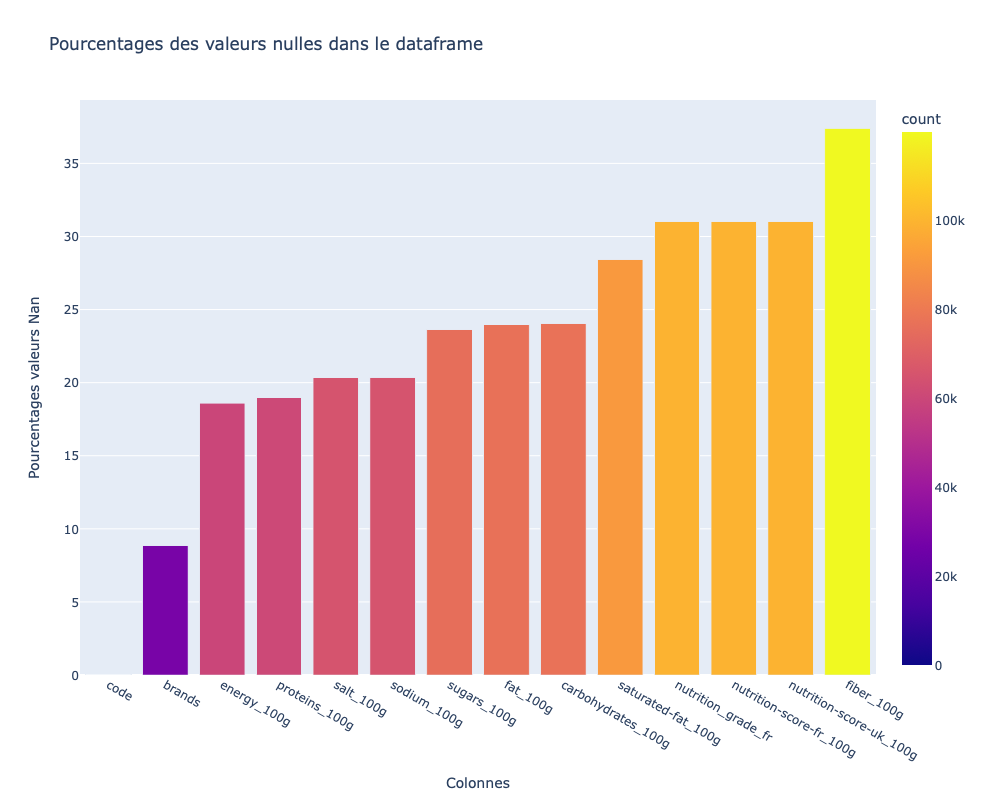

In [15]:
# controle valeurs manquantes dans data
plot_vn(data)

##### Traitement des valeurs nulles
- Pour les valeurs nutritionnels qui nous donne des caracteristiques des produits, on va les mettre a 0.
- On vas supprimer les valeurs manquantes des colonnes nutriscore
- On vas faire le mode pour la colonne brands, et donc appliquer le brands qui ressort le plus pour traite le 8% des valeurs nulles.

In [16]:
'''On filtre les valeurs qui finissent par _100g en excluant les valeurs des nutriscore, et donc on transforme les valeurs en une liste 
a utiliser pour localiser les valeurs nulles et donc faire un remplissemment avec des valeurs 0'''

# creation variable avec les valeurs nutritionnels
valeurs_nutritionnels = data.filter(regex='_100g').drop(columns=['nutrition-score-fr_100g', 'nutrition-score-uk_100g'])

# creation liste
nutr_columns = valeurs_nutritionnels.columns.to_list()

# filling NaN des colonnes nutritionnels avec des 0
data.loc[:, nutr_columns] = data.loc[:, nutr_columns].fillna(0)

In [17]:
# valeurs nulles dans les colonnes du nutriscore avant traitement
print('valeurs nulles dans les colonnes du nutriscore avant traitement :', data['nutrition-score-fr_100g'].isna().sum())

# drop valeurs nulles dans les colonnes du nutriscore (utilisez le même DataFrame 'data' ici)
data = data.dropna(subset=['nutrition_grade_fr', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g'])

# valeurs nulles dans les colonnes du nutriscore après traitement
print('valeurs nulles dans les colonnes du nutriscore après traitement :', data['nutrition-score-fr_100g'].isna().sum())

valeurs nulles dans les colonnes du nutriscore avant traitement : 99539
valeurs nulles dans les colonnes du nutriscore après traitement : 0


In [18]:
# Afficher le nombre de valeurs nulles dans la colonne 'brands' avant traitement
print('valeurs nulles dans la colonne brands avant traitement :', data['brands'].isna().sum())

# Calculer le mode de la colonne 'brands'
mode_brands = data['brands'].mode()[0]

# Remplir les valeurs nulles avec le mode
data['brands'].fillna(mode_brands, inplace=True)

# Afficher le nombre de valeurs nulles dans la colonne 'brands' après traitement
print('valeurs nulles dans la colonne brands après traitement :', data['brands'].isna().sum())

valeurs nulles dans la colonne brands avant traitement : 4638
valeurs nulles dans la colonne brands après traitement : 0


In [19]:
# controle des valeurs nulle dans la colonne data
print('il y a :',data.isnull().sum().sum(), 'valeurs nulles')

il y a : 0 valeurs nulles


### Traitement des valeurs aberrantes et atypiques

##### Etapes
1. Traitement des valeurs > a 100g
2. Traitement des outliers avec la méthode interquartile

In [20]:
# on enleve la colonne energy pour le traitement des valeur > a 100g
nutr_columns_base = nutr_columns.copy()
nutr_columns_base.remove('energy_100g')

In [21]:
# count des valeurs superieures a 100
val_maj_100 = (data[nutr_columns_base] > 100).sum()

# Display the count for each column
print("valeurs superieures a 100g:", val_maj_100.sum())


valeurs superieures a 100g: 103


In [22]:
for columnName in nutr_columns_base:
    ''' On utilise un if statement pour verifier si il y a des valeurs superieures a 100, puis on fait la creation d'une variable pour determiner
    la moyenne de la colonne et donc on subsitue les valeurs superieure a 100 avec la moyenne'''
    if (data[columnName] > 100).any():
        val_moyenne = data.loc[data[columnName] < 100, columnName].mean()    
        data.loc[data[columnName] > 100, columnName] = val_moyenne

In [23]:
# count des valeurs superieures a 100
val_maj_100 = (data[nutr_columns_base] > 100).sum()
# Display the count for each column
print("valeurs superieures a 100g apres traitement :", val_maj_100.sum())

valeurs superieures a 100g apres traitement : 0


In [24]:
# definition methode interquartile
def met_iqr(colonne):
    # definition quartiles
    Q1,Q3 = np.quantile(colonne , [0.25,0.75])
  
    if Q1 == 0 and Q3 == 0:
        return pd.Series([])
    
    #calcul IQR 
    IQR = Q3 - Q1
    # calcul limites
    limit_inferieure = Q1 - 1.5 * IQR
    limit_superieure = Q1 + 1.5 * IQR
    
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"limit inferieure: {limit_inferieure}, Limit superieure: {limit_superieure}")
    
    #definition ouliers
    ol = colonne[(colonne > limit_superieure) | (colonne < limit_inferieure)]
    return ol if not ol.empty else pd.Series([])

In [25]:
for columnName in nutr_columns:
    outliers = met_iqr(data[columnName])
    print(f'Number of outliers in column {columnName}: {len(outliers)}\n')
    
    # Drop rows with outliers
    data = data[~data[columnName].isin(outliers)]

Q1: 450.0, Q3: 1715.0, IQR: 1265.0
limit inferieure: -1447.5, Limit superieure: 2347.5
Number of outliers in column energy_100g: 13401

Q1: 0.0, Q3: 17.39, IQR: 17.39
limit inferieure: -26.085, Limit superieure: 26.085
Number of outliers in column fat_100g: 26499

Q1: 0.0, Q3: 4.0, IQR: 4.0
limit inferieure: -6.0, Limit superieure: 6.0
Number of outliers in column saturated-fat_100g: 33055

Q1: 5.3, Q3: 59.0, IQR: 53.7
limit inferieure: -75.25000000000001, Limit superieure: 85.85000000000001
Number of outliers in column carbohydrates_100g: 5558

Q1: 1.3, Q3: 13.64, IQR: 12.34
limit inferieure: -17.209999999999997, Limit superieure: 19.81
Number of outliers in column sugars_100g: 27220

Q1: 0.0, Q3: 3.0, IQR: 3.0
limit inferieure: -4.5, Limit superieure: 4.5
Number of outliers in column fiber_100g: 15136

Q1: 0.9, Q3: 9.8, IQR: 8.9
limit inferieure: -12.450000000000001, Limit superieure: 14.250000000000002
Number of outliers in column proteins_100g: 12389

Q1: 0.05334, Q3: 1.19, IQR: 1.

## Analyse des données

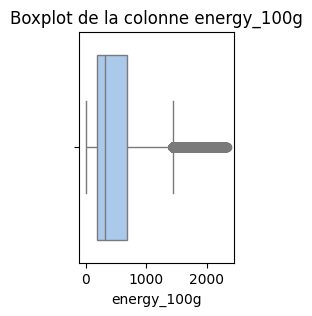

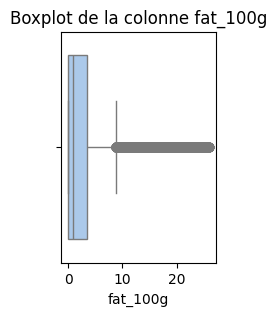

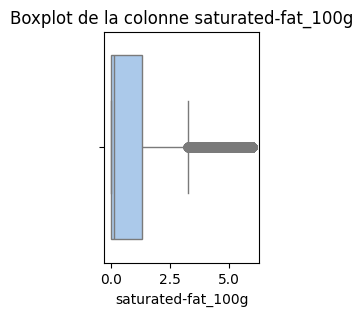

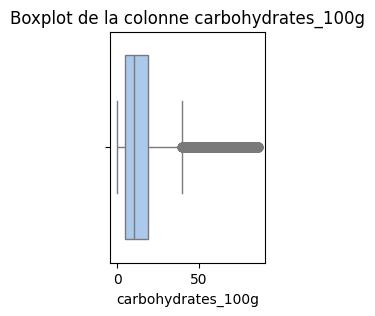

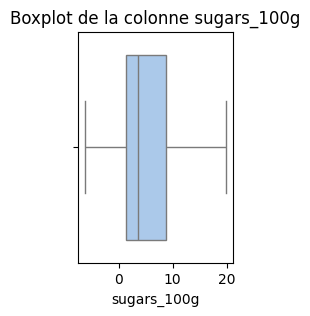

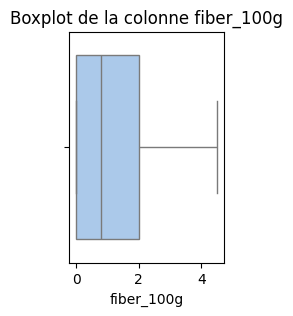

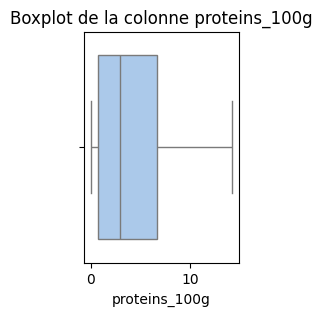

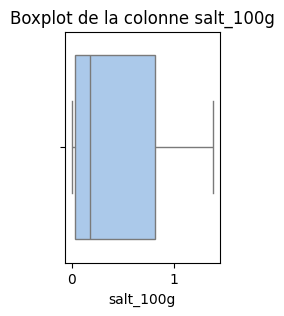

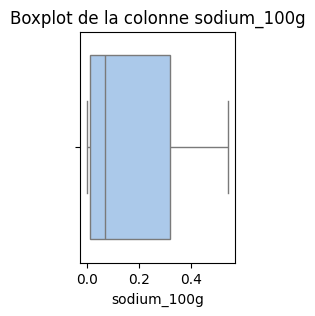

In [26]:
'''Creation d'une boucle for pour afficher des boxplot pour chqaue feature nutritionnels'''

# creation boucle for
for columnName in nutr_columns:
    plt.figure(figsize=(2, 3))
    boxplot_colors = sns.color_palette("pastel")
    sns.boxplot(data[columnName],color=boxplot_colors[0], orient="h")
    plt.title(f"Boxplot de la colonne {columnName}")
    
    # affichage graphique
    plt.show()

In [27]:
# initialisation methode pour créer des graphiques pour la correlation
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    # Extrait x et y 
    x,y=x_y
    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))
    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):
        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )
        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')
    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))
    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [28]:
# initialisation methode pour l'affichage sur le plan factoriel
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    # Transforme X_projected en np.array
    X_ = np.array(X_projected)
    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)
    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e
    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   
    # on définit x et y 
    x, y = x_y
    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters

    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')
    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1
    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)
    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 
    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

In [29]:
data_val = data.filter(regex='_100g')
# definition variable X
X = data_val

In [30]:
# definition features
features = data_val.columns

In [31]:
# Centrage et réduction 
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [32]:
# définition nombre des components
n_components = 10

In [33]:
# initialization components PCA
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=10)

In [34]:
# creation variable pour  variance pour chaque component 
scree = (pca.explained_variance_ratio_*100).round(2)
# creation variable pour  somme cumulée 
scree_cum = scree.cumsum().round()
# creation liste avec nombre des components
x_list = range(1, n_components+1)

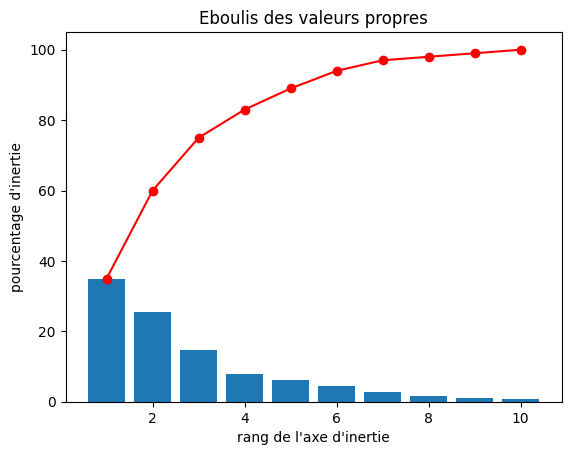

In [35]:
# affichage graphique des eboulis
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [36]:
# calcul des components
pcs = pca.components_

In [37]:
# conversion de l'array en dataframe
pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs

energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
F1      0.354685  0.398414            0.344131            0.213207   
F2      0.273161 -0.054589           -0.198852            0.339714   
F3      0.363705  0.080589            0.136198            0.413319   
F4      0.085604 -0.342594           -0.532091            0.319288   
F5     -0.161007  0.309402            0.270275           -0.257138   
F6      0.107120  0.346157           -0.137854            0.236983   
F7     -0.039402  0.688362           -0.492469           -0.010910   
F8      0.070539  0.100372           -0.307294           -0.372292   
F9      0.597297 -0.073260           -0.227121           -0.537059   
F10     0.509198 -0.097892            0.244477           -0.130103   

     sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
F1     -0.095090    0.122986       0.313394   0.393967     0.393967   
F2     -0.247324    0.423173       0.316089  -0.043943    -0.043950   
F3      0.471904   -0.093807       0.127546  -0.437277    -0.437273   
F4      0.392892    0.239580      -0.235895   0.282583     0.282600   
F5      0.465752    0.658934      -0.238565  -0.012995    -0.013001   
F6     -0.508011    0.202212      -0.621183  -0.165169    -0.165160   
F7      0.246210   -0.370442       0.018715   0.078214     0.078189   
F8     -0.081646    0.243947       0.361438  -0.105660    -0.105648   
F9     -0.017402    0.060254      -0.033137  -0.070896    -0.070882   
F10     0.100710   -0.253277      -0.393815   0.148508     0.148405   

     nutrition-score-fr_100g  nutrition-score-uk_100g  
F1                  0.193517                 0.285183  
F2                 -0.471576                -0.448388  
F3                  0.170976                 0.111488  
F4                  0.208442                 0.140222  
F5                 -0.145750                -0.097797  
F6                  0.199918                 0.119068  
F7                 -0.214922                -0.159190  
F8                  0.676030                -0.275251  
F9                 -0.299951                 0.439090  
F10                 0.114444                -0.606531

In [38]:
# definition variable pour effectuer la projection du graphique 
X_proj = pca.transform(X_scaled)

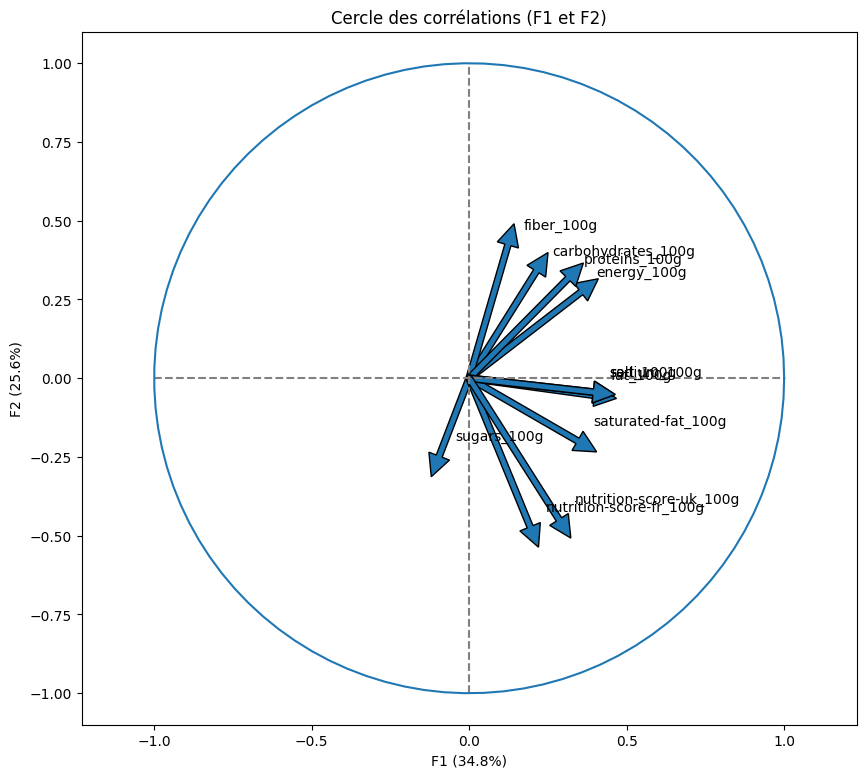

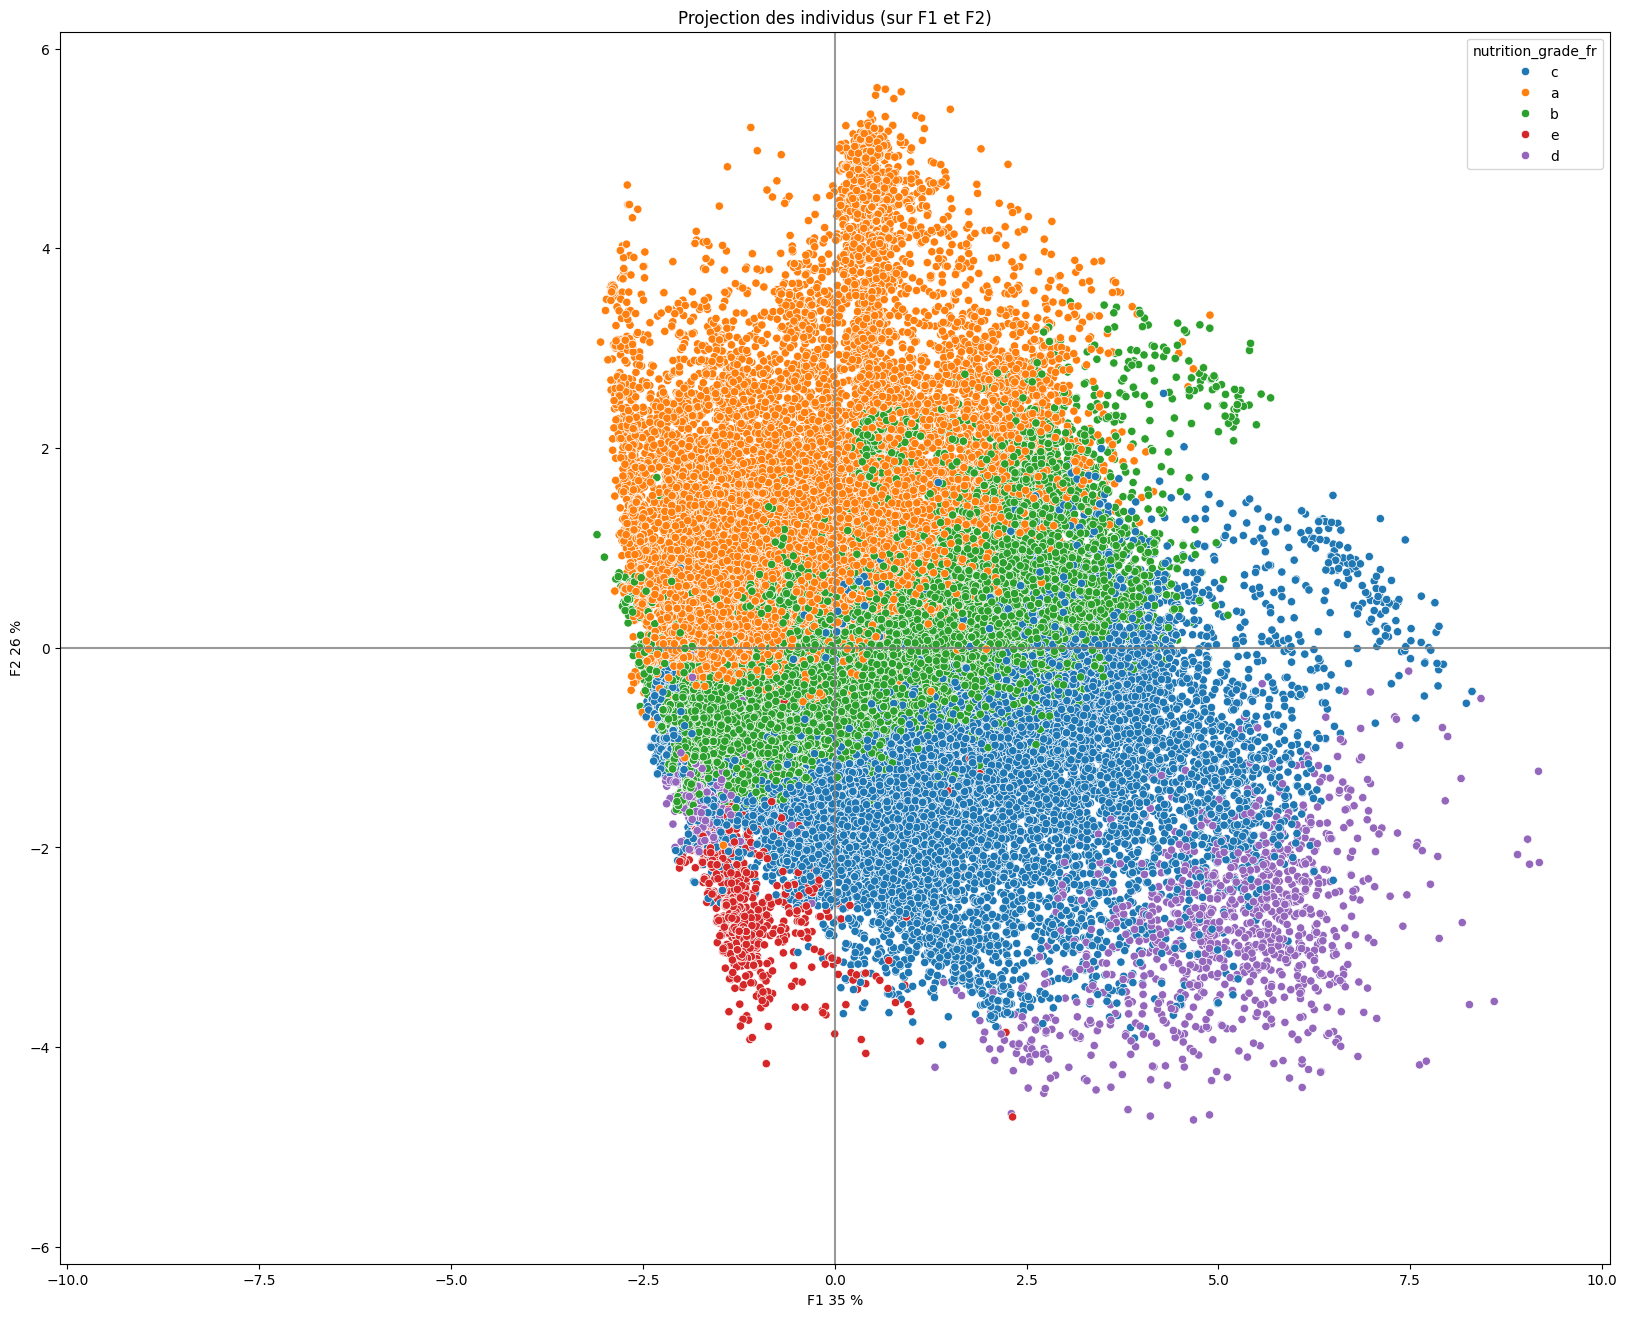

In [39]:
# affichage des graphiques
x_y = [0,1]
correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, figsize=(20,16), clusters=data['nutrition_grade_fr'])


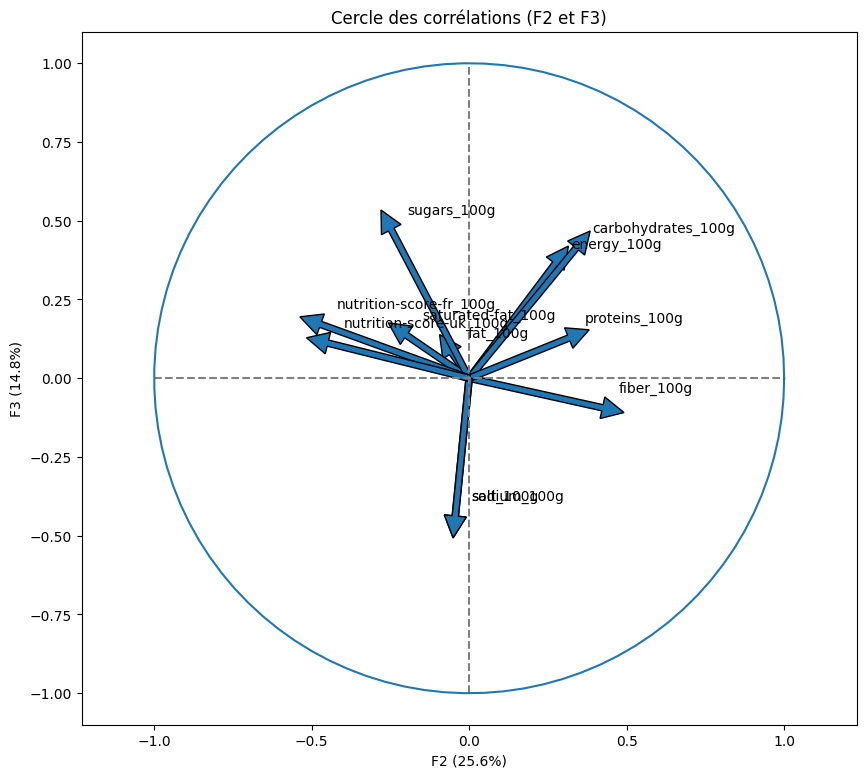

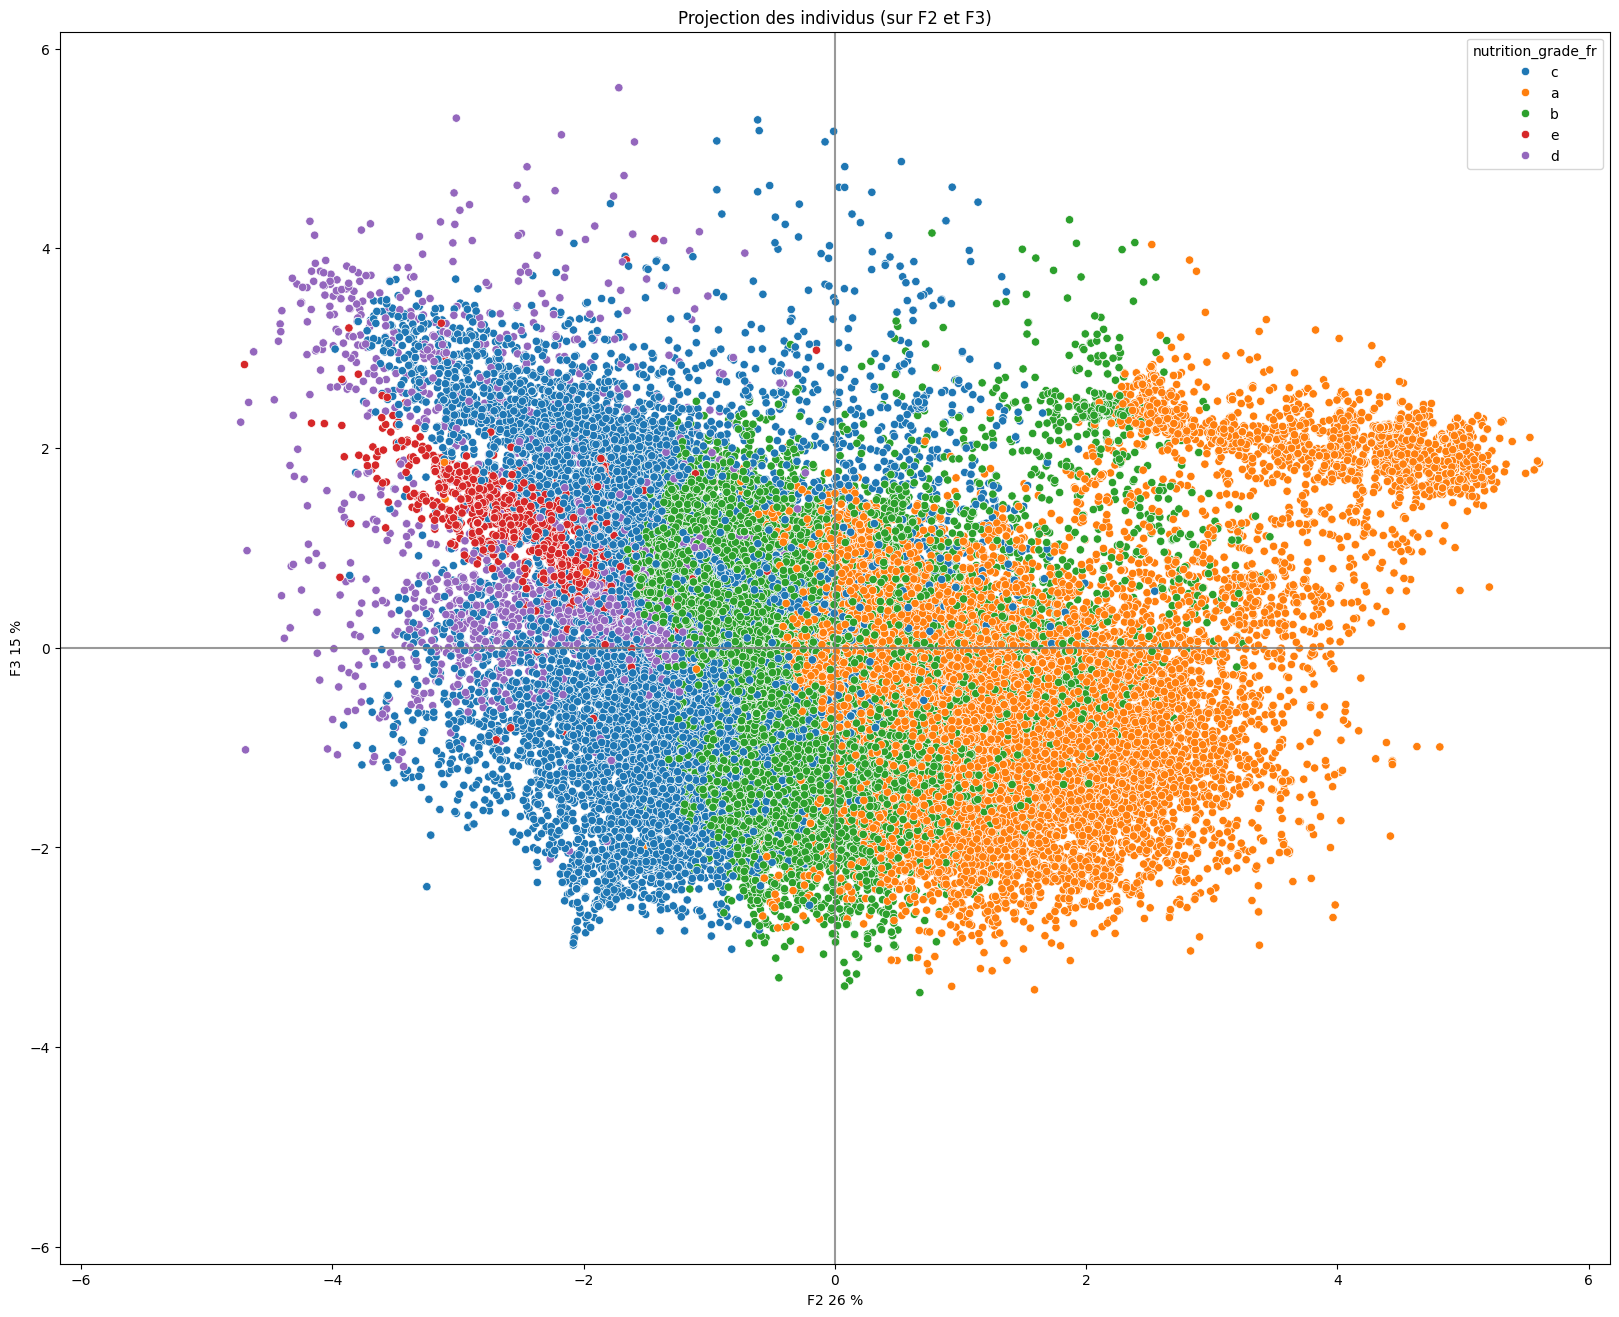

In [40]:
# affichage des graphiques
x_y = [1,2]
correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, figsize=(20,16), clusters=data['nutrition_grade_fr'])

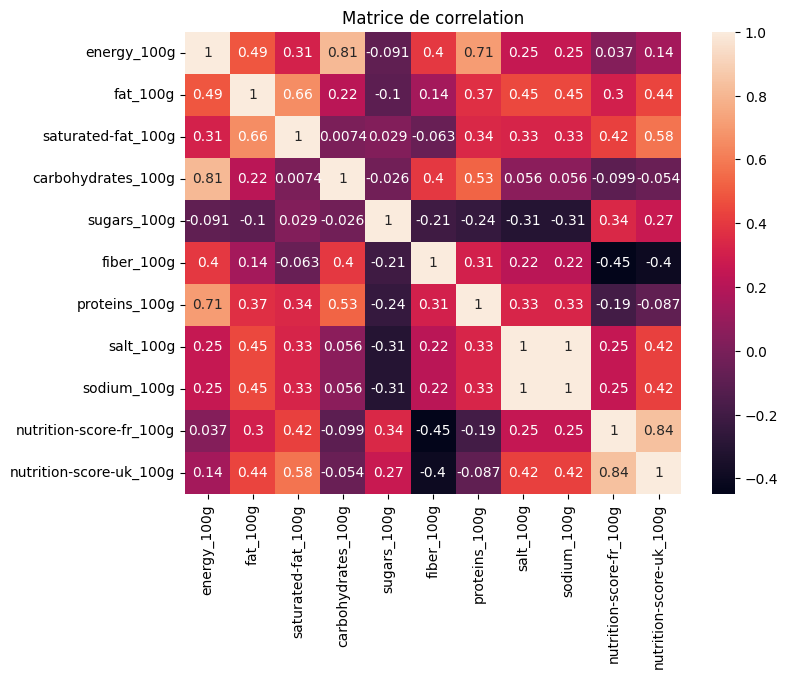

In [41]:
# creation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data_val.corr(), annot=True)
plt.title('Matrice de correlation')
plt.show()

In [42]:
# definition de la fonciton pour calculer Anova
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
            
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [43]:
# creation liste vide
resultat_anova = []

'''Creation d'une boucle for pour calculer l'anova pour chaque colonnes des valeurs nutritionnels'''
for nutriment in nutr_columns:
    X = data['nutrition_grade_fr']
    Y = data[nutriment]
    
    # calcul anova
    anova = eta_squared(X, Y)
    
    # append resultat dans un liste
    resultat_anova.append({'valeurs_nutritionnels': nutriment, 'anova': anova})

In [44]:
# affichage resultat
result_df = pd.DataFrame(resultat_anova)
result_df

valeurs_nutritionnels     anova
0           energy_100g  0.063728
1              fat_100g  0.127447
2    saturated-fat_100g  0.230383
3    carbohydrates_100g  0.035600
4           sugars_100g  0.105468
5            fiber_100g  0.236450
6         proteins_100g  0.095173
7             salt_100g  0.112829
8           sodium_100g  0.112834

Comme attendu, on observe que les colonnes ont une valeur ANOVA < 0, donc les features dans les colonnes nutritionnels montrent une correlation avec le nutriscore.

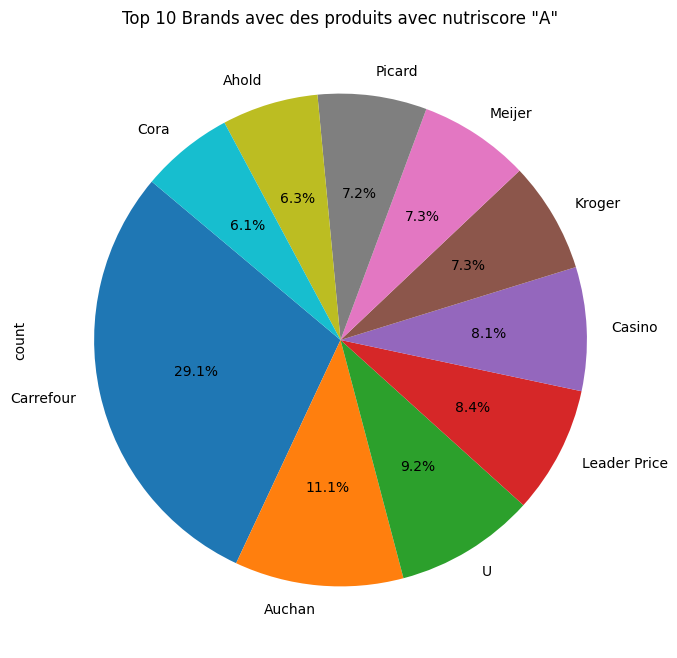

In [45]:
'''On vas filtrer les données pour avoir les lignes qui ont un nutriscore qui equivaut a 'a', puis on fait une 
count pour la creation d'une piechart, et donc on filtre pour avoir seulement le premier 10 '''

#filtrage des données
data_filtre = data[data['nutrition_grade_fr'] == 'a']

# counts des lignes par brands
brand_counts = data_filtre['brands'].value_counts()

# top 10 des valeurs
top_10_brands = brand_counts.head(10)

# affichage graphique
plt.figure(figsize=(10, 8))
top_10_brands.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Brands avec des produits avec nutriscore "A"')
plt.show()

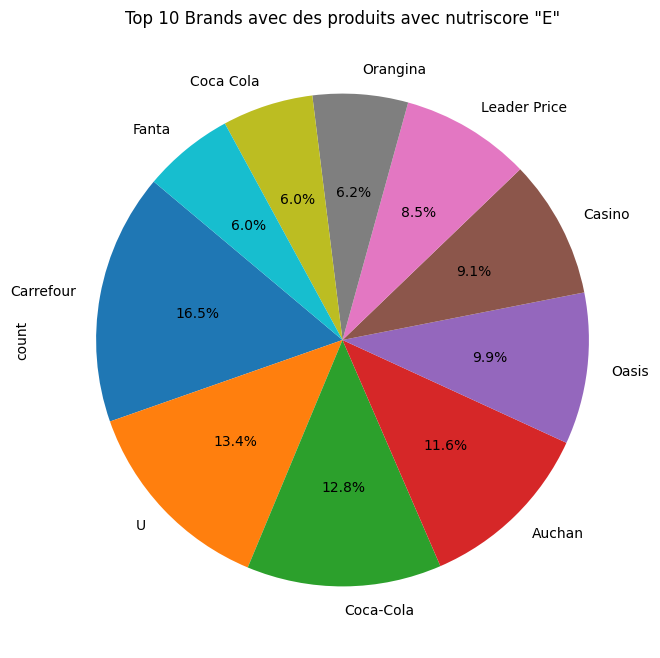

In [46]:
'''On vas filtrer les données pour avoir les lignes qui ont un nutriscore qui equivaut a 'a', puis on fait une 
count pour la creation d'une piechart, et donc on filtre pour avoir seulement le premier 10 '''

#filtrage des données
data_filtre = data[data['nutrition_grade_fr'] == 'e']

# counts des lignes par brands
brand_counts = data_filtre['brands'].value_counts()

# top 10 des valeurs
top_10_brands = brand_counts.head(10)

# affichage graphique
plt.figure(figsize=(10, 8))
top_10_brands.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Brands avec des produits avec nutriscore "E"')
plt.show()